Tolerance = 0.001
Jacobi:
  x = [ 3.0000225  -2.50000266  6.99998104]
  iterations = 4
  time(s) = 0.00015372596681118011
Gauss-Seidel:
  x = [ 3.00000035 -2.50000004  6.99999999]
  iterations = 4
  time(s) = 0.00019779056310653687
Tolerance = 1e-06
Jacobi:
  x = [ 3.  -2.5  7. ]
  iterations = 7
  time(s) = 0.00014318153262138367
Gauss-Seidel:
  x = [ 3.  -2.5  7. ]
  iterations = 5
  time(s) = 0.00014896877110004425
Tolerance = 1e-09
Jacobi:
  x = [ 3.  -2.5  7. ]
  iterations = 9
  time(s) = 0.0001643449068069458
Gauss-Seidel:
  x = [ 3.  -2.5  7. ]
  iterations = 7
  time(s) = 0.00021571479737758636


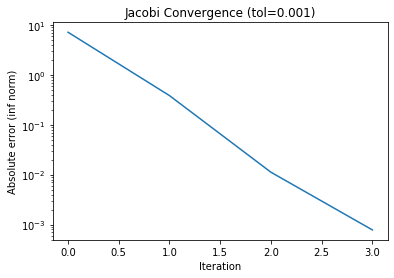

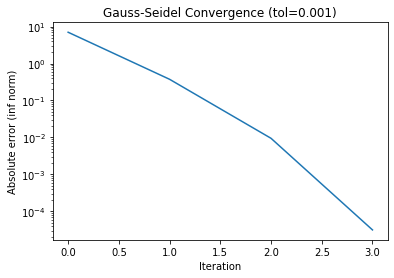

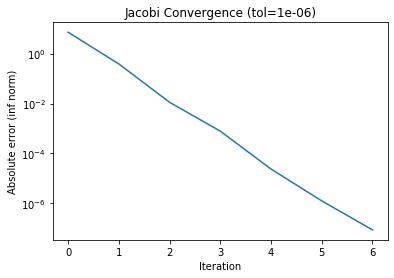

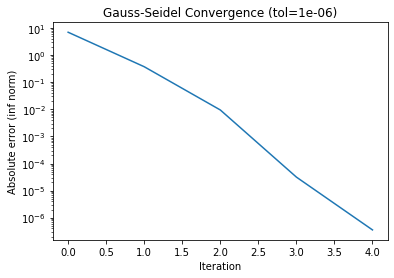

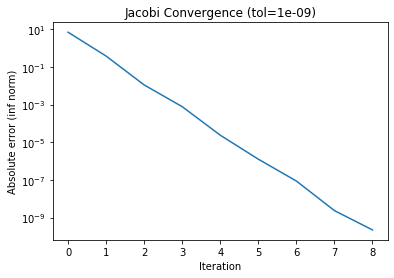

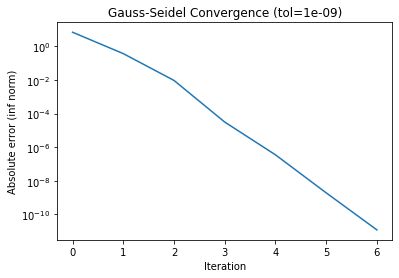

In [2]:
# Mrinal Pradhan
# Homework 4
# Jacobi vs Gauss Seidel

import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

A = np.array([
    [3.0,  -0.1, -0.2],
    [0.1,   7.0, -0.3],
    [0.3,  -0.2, 10.0]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)

def jacobi(A: np.ndarray, b: np.ndarray, x0: np.ndarray, tol: float, max_iter: int = 100000):
    A = np.asarray(A, dtype=float)
    b = np.asarray(b, dtype=float)
    x = np.asarray(x0, dtype=float).copy()
    D = np.diag(A)
    
    if np.any(D == 0):
        raise ValueError("Jacobi: zero found on diagonal.")
    R = A - np.diagflat(D)
    errors = []
    start = perf_counter()
    
    for k in range(1, max_iter + 1):
        x_new = (b - R @ x) / D
        err = np.linalg.norm(x_new - x, ord=np.inf)  # absolute error between iterations
        errors.append(err)
        x = x_new
        if err < tol:
            return x, k, perf_counter() - start, np.array(errors)
    return x, max_iter, perf_counter() - start, np.array(errors)


def gauss_seidel(A: np.ndarray, b: np.ndarray, x0: np.ndarray, tol: float, max_iter: int = 100000):
    A = np.asarray(A, dtype=float)
    b = np.asarray(b, dtype=float)
    x = np.asarray(x0, dtype=float).copy()
    n = b.size
    errors = []
    start = perf_counter()

    for k in range(1, max_iter + 1):
        x_old = x.copy()
        for i in range(n):
            if A[i, i] == 0:
                raise ValueError("Gauss-Seidel: zero found on diagonal.")
            s1 = A[i, :i] @ x[:i]              
            s2 = A[i, i+1:] @ x_old[i+1:]      
            x[i] = (b[i] - s1 - s2) / A[i, i]

        err = np.linalg.norm(x - x_old, ord=np.inf)  
        errors.append(err)
        if err < tol:
            return x, k, perf_counter() - start, np.array(errors)

    return x, max_iter, perf_counter() - start, np.array(errors)


def run_all(A, b, tolerances=(1e-3, 1e-6, 1e-9)):
    x0 = np.zeros_like(b, dtype=float)
    
    for tol in tolerances:
        xj, itj, tj, errj = jacobi(A, b, x0, tol)
        xg, itg, tg, errg = gauss_seidel(A, b, x0, tol)

        print(f"Tolerance = {tol}")
        print("Jacobi:")
        print("  x =", xj)
        print("  iterations =", itj)
        print("  time(s) =", tj)

        print("Gauss-Seidel:")
        print("  x =", xg)
        print("  iterations =", itg)
        print("  time(s) =", tg)

        # Plot error convergence for Jacobi
        plt.figure()
        plt.semilogy(errj)
        plt.title(f"Jacobi Convergence (tol={tol})")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute error")

        # Plot error convergence for Gauss-Seidel
        plt.figure()
        plt.semilogy(errg)
        plt.title(f"Gauss-Seidel Convergence (tol={tol})")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute error")

    plt.show()

run_all(A, b)

# For the first tolerence level the number iteratiosn were the same, but for the other 2 Jacobi required more iterations.
# Discuss: As the tolerance decreases, both Jacobi and Gauss-Seidel require more iterations to converge, but Gauss-Seidel consistently converges faster due to its use of updated intermediate values.